## Unsupervised learning
### Li Ruixue

#### 1

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

url = "https://github.com/UC-MACSS/persp-analysis/blob/master/assignments/unsupervised-learning/data/College.csv?raw=True"
df = pd.read_csv(url)
del df['Private']
df.head()


In [384]:
pca = PCA()
pca_data = pca.fit_transform(df)
pca_2 = pca_data[:, :2]
pca_2

pca_2_df = pd.DataFrame(pca_2, columns = ['PC1', 'PC2', ])
pca_2_df.head()


,PC1,PC2
0,-2551.837861,-3445.947204
1,-743.729533,2227.363556
2,-3373.556212,674.252485
3,-1436.826773,9838.720340
4,-4413.839496,546.421237


In [301]:
pca_comp_2_df = pd.DataFrame(pca.components_.T[:, :2], index = df.columns, columns = ['PC1', 'PC2'])
pca_comp_2_df.head()

,PC1,PC2
Apps,0.557026,-0.039361
Accept,0.347712,-0.077162
Enroll,0.129854,-0.045413
Top10perc,0.001025,0.001706
Top25perc,0.001177,0.001497


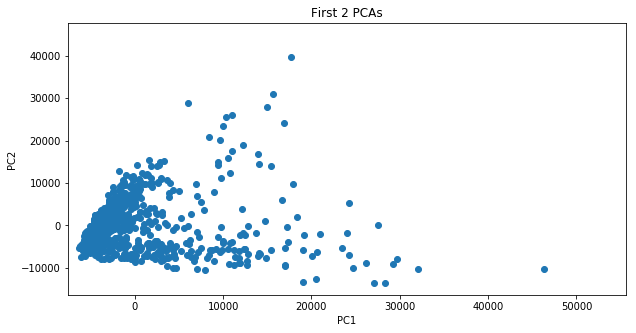

In [302]:
xmin = pca_2_df['PC1'].min()
xmax = pca_2_df['PC1'].max()

ymin = pca_2_df['PC2'].min()
ymax = pca_2_df['PC2'].max()

SCALE = 1.2

plt.figure(figsize= (10,5))
plt.xlim(xmin * SCALE, xmax * SCALE)
plt.ylim(ymin * SCALE, ymax * SCALE)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First 2 PCAs')

plt.scatter(x = pca_2_df['PC1'], y = pca_2_df['PC2'])
plt.show()

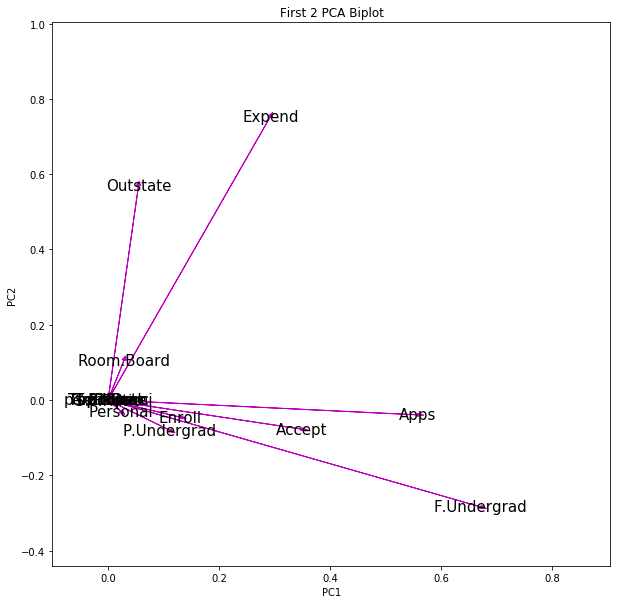

In [303]:
xmin = pca_comp_2_df['PC1'].min()
xmax = pca_comp_2_df['PC1'].max()

ymin = pca_comp_2_df['PC2'].min()
ymax = pca_comp_2_df['PC2'].max()


SCALE = 1.2
PAD = 0.1

plt.figure(figsize= (10,10))
plt.xlim(xmin * SCALE - PAD, xmax * SCALE + PAD)
plt.ylim(ymin * SCALE - PAD, ymax * SCALE + PAD)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First 2 PCA Biplot')

for i in range(len(df.columns)):
    x = pca_comp_2_df.iloc[i, 0]
    y = pca_comp_2_df.iloc[i, 1]
    plt.arrow(0, 0, x, y, color='m',
              width=0.0001, head_width=0.008)
    plt.text(x, y, pca_comp_2_df.index[i], color='k', ha='center', va='center', fontsize=15)

plt.show()


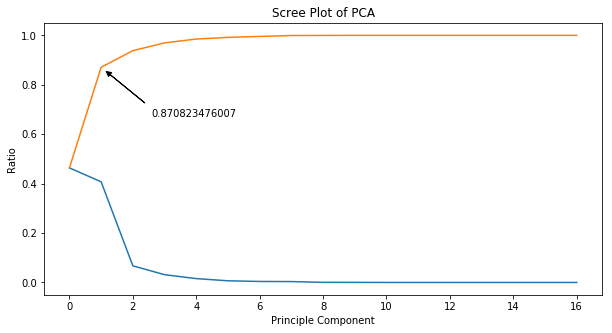

In [304]:
plt.figure(figsize= (10,5))

plt.xlabel('Principle Component')
plt.ylabel('Ratio')
plt.title('Scree Plot of PCA')

plt.plot(pca.explained_variance_ratio_)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_ratio)
plt.annotate(cum_ratio[1], xy = (1, cum_ratio[1]), xytext = (2.6, cum_ratio[1]-0.2),
            arrowprops = dict(color = 'k', shrink = 0.1, width = 0.01, headlength = 5, headwidth = 5))
plt.show()

### Clustering States
#### 1

In [305]:
url = "https://github.com/UC-MACSS/persp-analysis/blob/master/assignments/unsupervised-learning/data/USArrests.csv?raw=True"
df = pd.read_csv(url, index_col = 0)
df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [306]:
pca = PCA()
pca_data = pca.fit_transform(df)
pca_2 = pca_data[:, :2]
pca_2_df = pd.DataFrame(pca_2,index = df.index, columns = ['PC1', 'PC2', ])
pca_2_df.head()


,PC1,PC2
State,,
Alabama,64.802164,11.448007
Alaska,92.827450,17.982943
Arizona,124.068216,-8.830403
Arkansas,18.340035,16.703911
California,107.422953,-22.520070


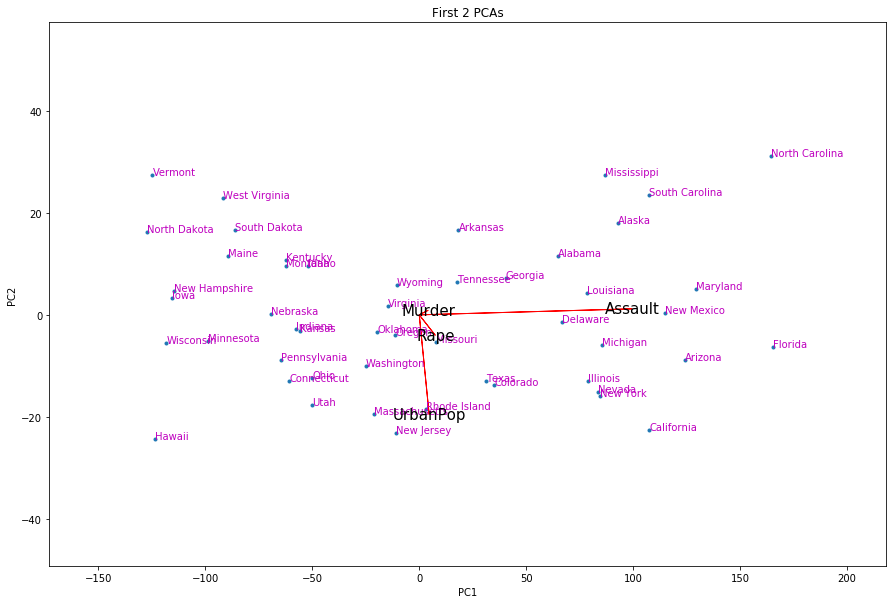

In [307]:
xmin = pca_2_df['PC1'].min()
xmax = pca_2_df['PC1'].max()

ymin = pca_2_df['PC2'].min()
ymax = pca_2_df['PC2'].max()

SCALE = 1.2
PAD = 20

plt.figure(figsize= (15,10))

plt.xlim(xmin * SCALE - PAD, xmax * SCALE + PAD)
plt.ylim(ymin * SCALE - PAD, ymax * SCALE + PAD)

plt.scatter(x = pca_2_df['PC1'], y = pca_2_df['PC2'], marker = '.')

for i in pca_2_df.index:
    plt.annotate(i, (pca_2_df.loc[i]['PC1'], pca_2_df.loc[i]['PC2']), color = 'm')

pca_comp_2_df = pd.DataFrame(pca.components_.T[:, :2], index = df.columns, columns = ['PC1', 'PC2'])

for i in range(len(df.columns)):
    x = pca_comp_2_df.iloc[i, 0]
    y = pca_comp_2_df.iloc[i, 1]
    plt.arrow(0, 0, x*100, y*20, color='r',
              width=0.0001, head_width=0.008)
    plt.text(x*100, y*20, pca_comp_2_df.index[i], color='k', ha='center', va='center', fontsize=15)
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First 2 PCAs')
    
plt.show()

#### 2

In [313]:
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hr

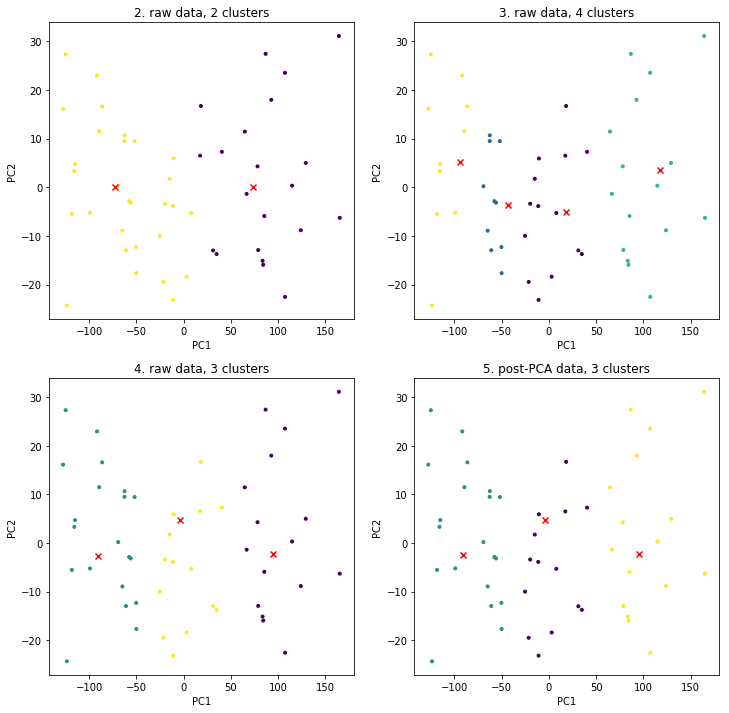

In [314]:
def perform_kmeans(df, n, ax, title, xlabel, ylabel):
    km = KMeans(n_clusters=n).fit(df)
    clusters = km.labels_
    ax.scatter(x = pca_2_df['PC1'], y = pca_2_df['PC2'], marker = '.', c = clusters)
    centers = km.cluster_centers_
    pca_c = pca.fit_transform(centers)
    ax.scatter(x = pca_c[:, 0], y = pca_c[:, 1], marker = 'x', c = 'r')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)


figure, axes = plt.subplots(2, 2, figsize = (12,12))

perform_kmeans(df, 2, axes[0,0], "2. raw data, 2 clusters", 'PC1', 'PC2')
perform_kmeans(df, 4, axes[0,1], "3. raw data, 4 clusters", 'PC1', 'PC2')
perform_kmeans(df, 3, axes[1,0], "4. raw data, 3 clusters", 'PC1', 'PC2')
perform_kmeans(pca_2_df, 3, axes[1,1], "5. post-PCA data, 3 clusters", 'PC1', 'PC2')

plt.show()


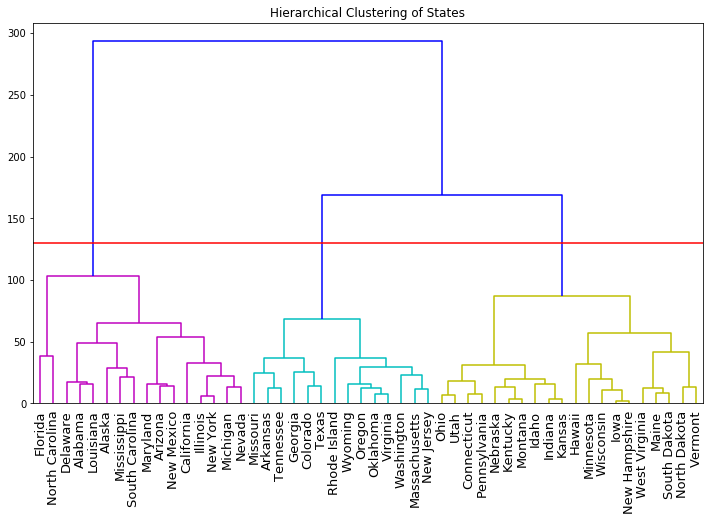

In [379]:
def draw_dendro(df, ct):
    l = hr.linkage(df, method='complete', metric='euclidean')
    plt.figure(figsize = (12, 7))
    dn = hr.dendrogram(l, labels = df.index, color_threshold =ct, leaf_font_size = 13)
    hr.set_link_color_palette(['m', 'c', 'y', 'k'])
    plt.title('Hierarchical Clustering of States')
    plt.axhline(130, color='r')
    plt.show()
    
draw_dendro(df, 110)

In [361]:
from sklearn.preprocessing import StandardScaler

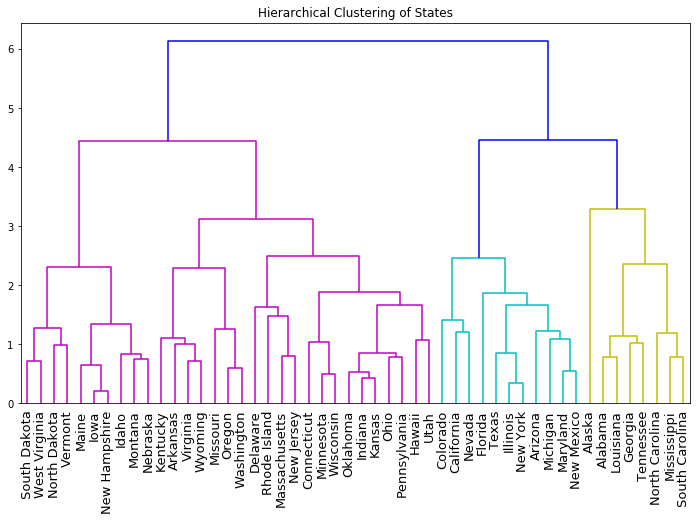

In [382]:
scalar = StandardScaler(with_std = 1)
scaled = scalar.fit_transform(df)
df_scaled = pd.DataFrame(scaled, index = df.index, columns = df.columns)

draw_dendro(df_scaled, 4.45)